# Q1.  Perform K means clustering, Hirarchial clustering and DBSCAN for the data given below. 

In [1]:
import pandas as pd

# Data extracted from the image
data = {
    'University': [
        'Harvard', 'Princeton', 'Yale', 'Stanford', 'MIT', 'Duke', 'CalTech', 'Dartmouth', 'Brown', 
        'JohnsHopkins', 'UChicago', 'UPenn', 'Cornell', 'Northwestern', 'Columbia', 'NotreDame', 
        'UVirginia', 'Georgetown', 'CarnegieMellon', 'UMichigan', 'UCBerkeley', 'UWisconsin', 
        'PennState', 'Purdue', 'TexasA&M'
    ],
    'SAT': [
        14.00, 13.75, 13.75, 13.60, 13.80, 13.15, 14.15, 13.40, 13.10, 
        13.05, 12.90, 12.85, 12.80, 12.60, 13.10, 12.55, 12.25, 12.55, 
        12.60, 11.80, 12.40, 10.85, 10.81, 10.05, 10.75
    ],
    'Top10': [
        91, 91, 95, 90, 94, 90, 100, 89, 89, 75, 75, 80, 83, 85, 76, 
        81, 77, 74, 62, 65, 95, 40, 38, 28, 49
    ],
    'Accept': [
        14, 14, 19, 20, 30, 30, 25, 23, 22, 44, 50, 36, 33, 39, 24, 
        42, 44, 24, 59, 68, 40, 69, 54, 90, 67
    ],
    'SFRatio': [
        11, 8, 11, 12, 10, 12, 6, 10, 13, 7, 13, 11, 13, 11, 12, 13, 
        14, 12, 9, 16, 17, 15, 18, 19, 25
    ],
    'Expenses': [
        39.525, 30.220, 43.514, 36.450, 34.870, 31.585, 63.575, 32.162, 
        22.704, 58.691, 38.380, 27.553, 21.864, 28.052, 31.510, 15.122, 
        13.349, 20.126, 25.026, 15.470, 15.140, 11.857, 10.185, 9.066, 8.704
    ],
    'Grad': [
        97, 95, 96, 93, 91, 95, 81, 95, 94, 87, 87, 90, 90, 89, 88, 
        94, 92, 92, 72, 85, 78, 71, 80, 69, 67
    ]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)

        University    SAT  Top10  Accept  SFRatio  Expenses  Grad
0          Harvard  14.00     91      14       11    39.525    97
1        Princeton  13.75     91      14        8    30.220    95
2             Yale  13.75     95      19       11    43.514    96
3         Stanford  13.60     90      20       12    36.450    93
4              MIT  13.80     94      30       10    34.870    91
5             Duke  13.15     90      30       12    31.585    95
6          CalTech  14.15    100      25        6    63.575    81
7        Dartmouth  13.40     89      23       10    32.162    95
8            Brown  13.10     89      22       13    22.704    94
9     JohnsHopkins  13.05     75      44        7    58.691    87
10        UChicago  12.90     75      50       13    38.380    87
11           UPenn  12.85     80      36       11    27.553    90
12         Cornell  12.80     83      33       13    21.864    90
13    Northwestern  12.60     85      39       11    28.052    89
14        

In [3]:
from sklearn.preprocessing import StandardScaler

# Extract features for clustering
X = df[['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'Grad']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\junsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\junsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


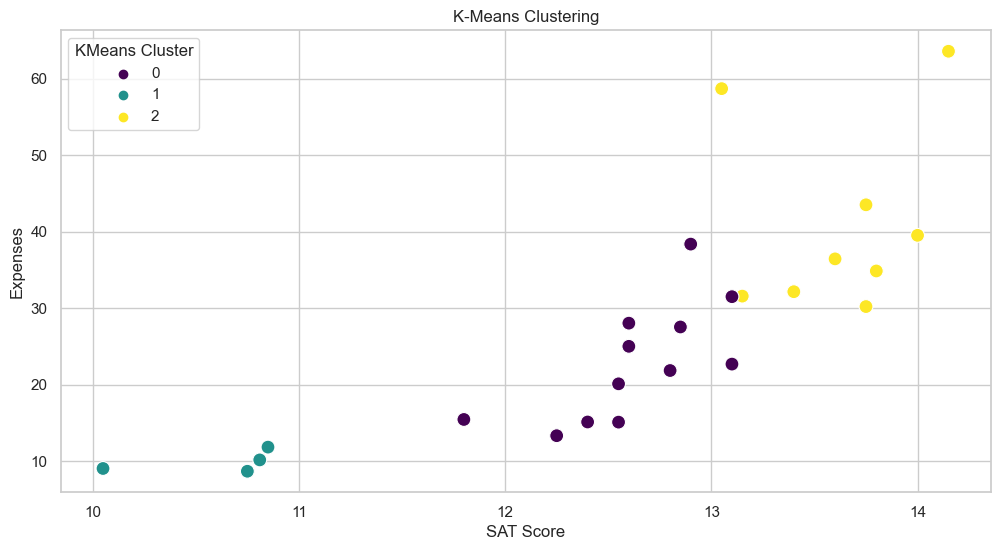

In [4]:
## 1. K-means clustering in Python
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


# Set up style for plots
sns.set(style="whitegrid")

# Plot K-Means Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='SAT', y='Expenses', hue='KMeans_Cluster', palette='viridis', s=100)
plt.title("K-Means Clustering")
plt.xlabel("SAT Score")
plt.ylabel("Expenses")
plt.legend(title='KMeans Cluster')
plt.show()

C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

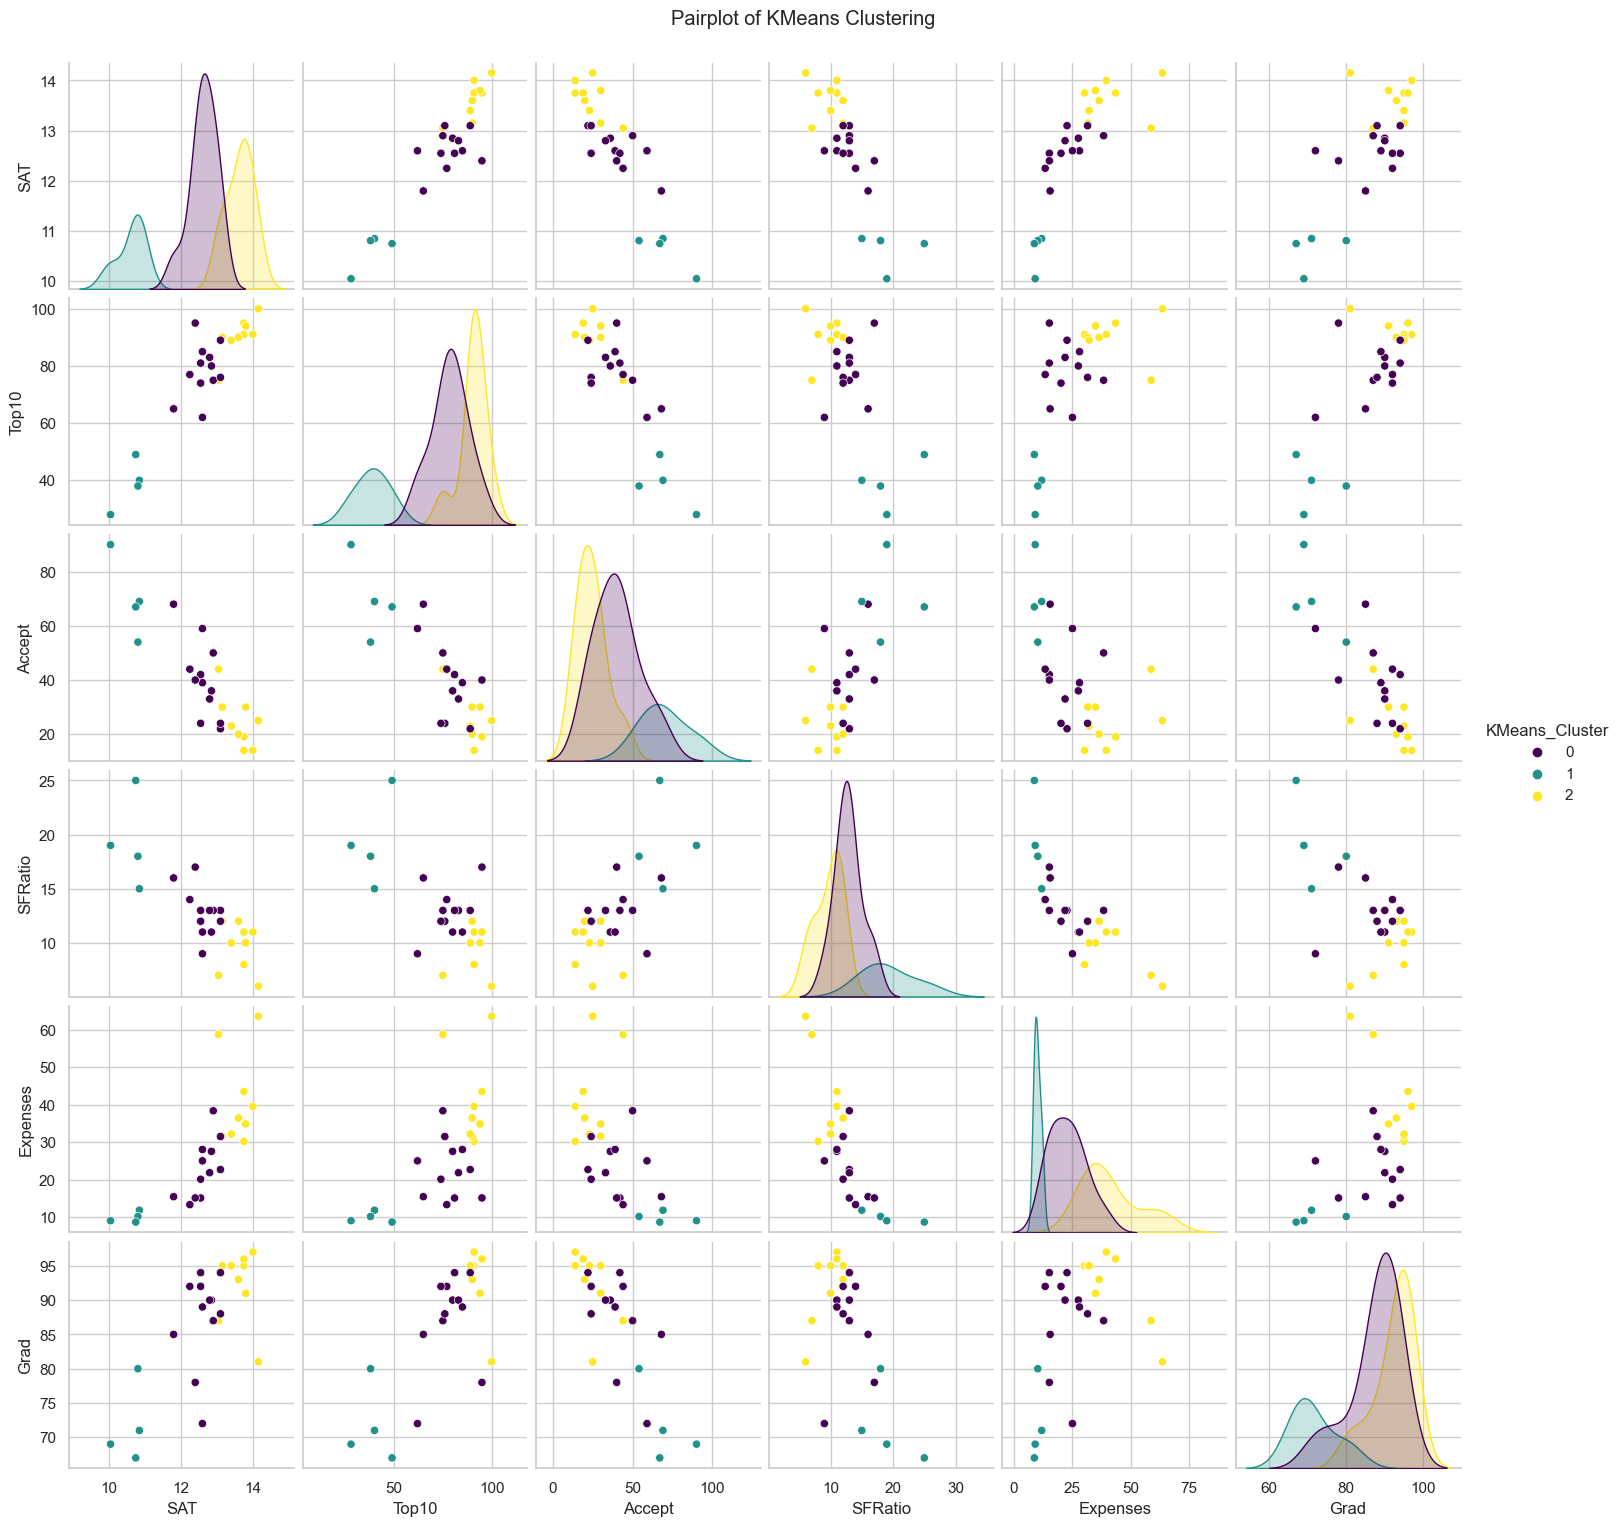

In [7]:
# Pairplot for all features to see the separation of clusters in KMeans
sns.pairplot(df, vars=['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'Grad'], hue='KMeans_Cluster', palette='viridis')
plt.suptitle("Pairplot of KMeans Clustering", y=1.02)
plt.show()

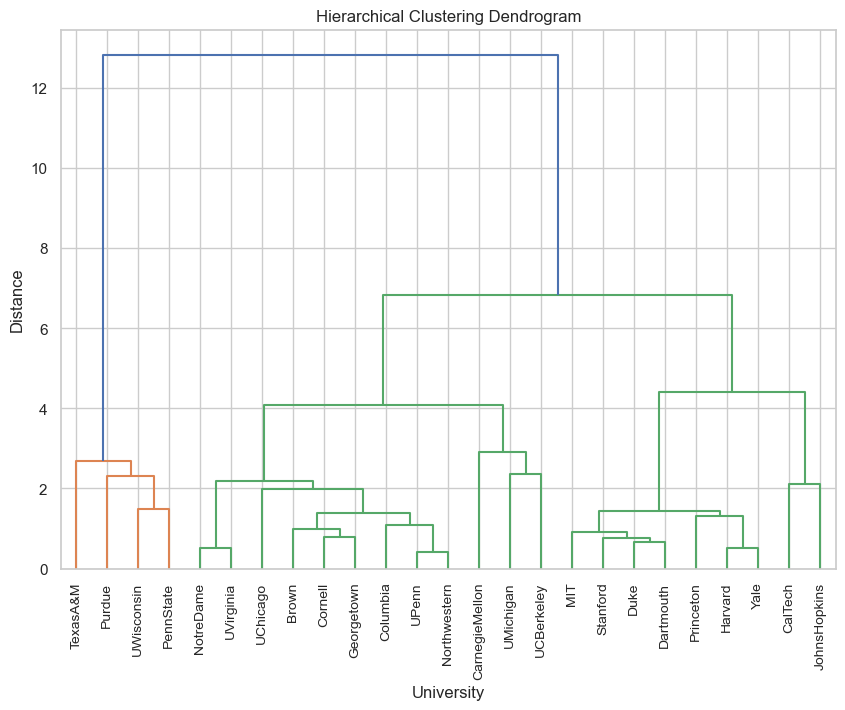

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 2. Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

# Plot dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['University'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('University')
plt.ylabel('Distance')
plt.show()

C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

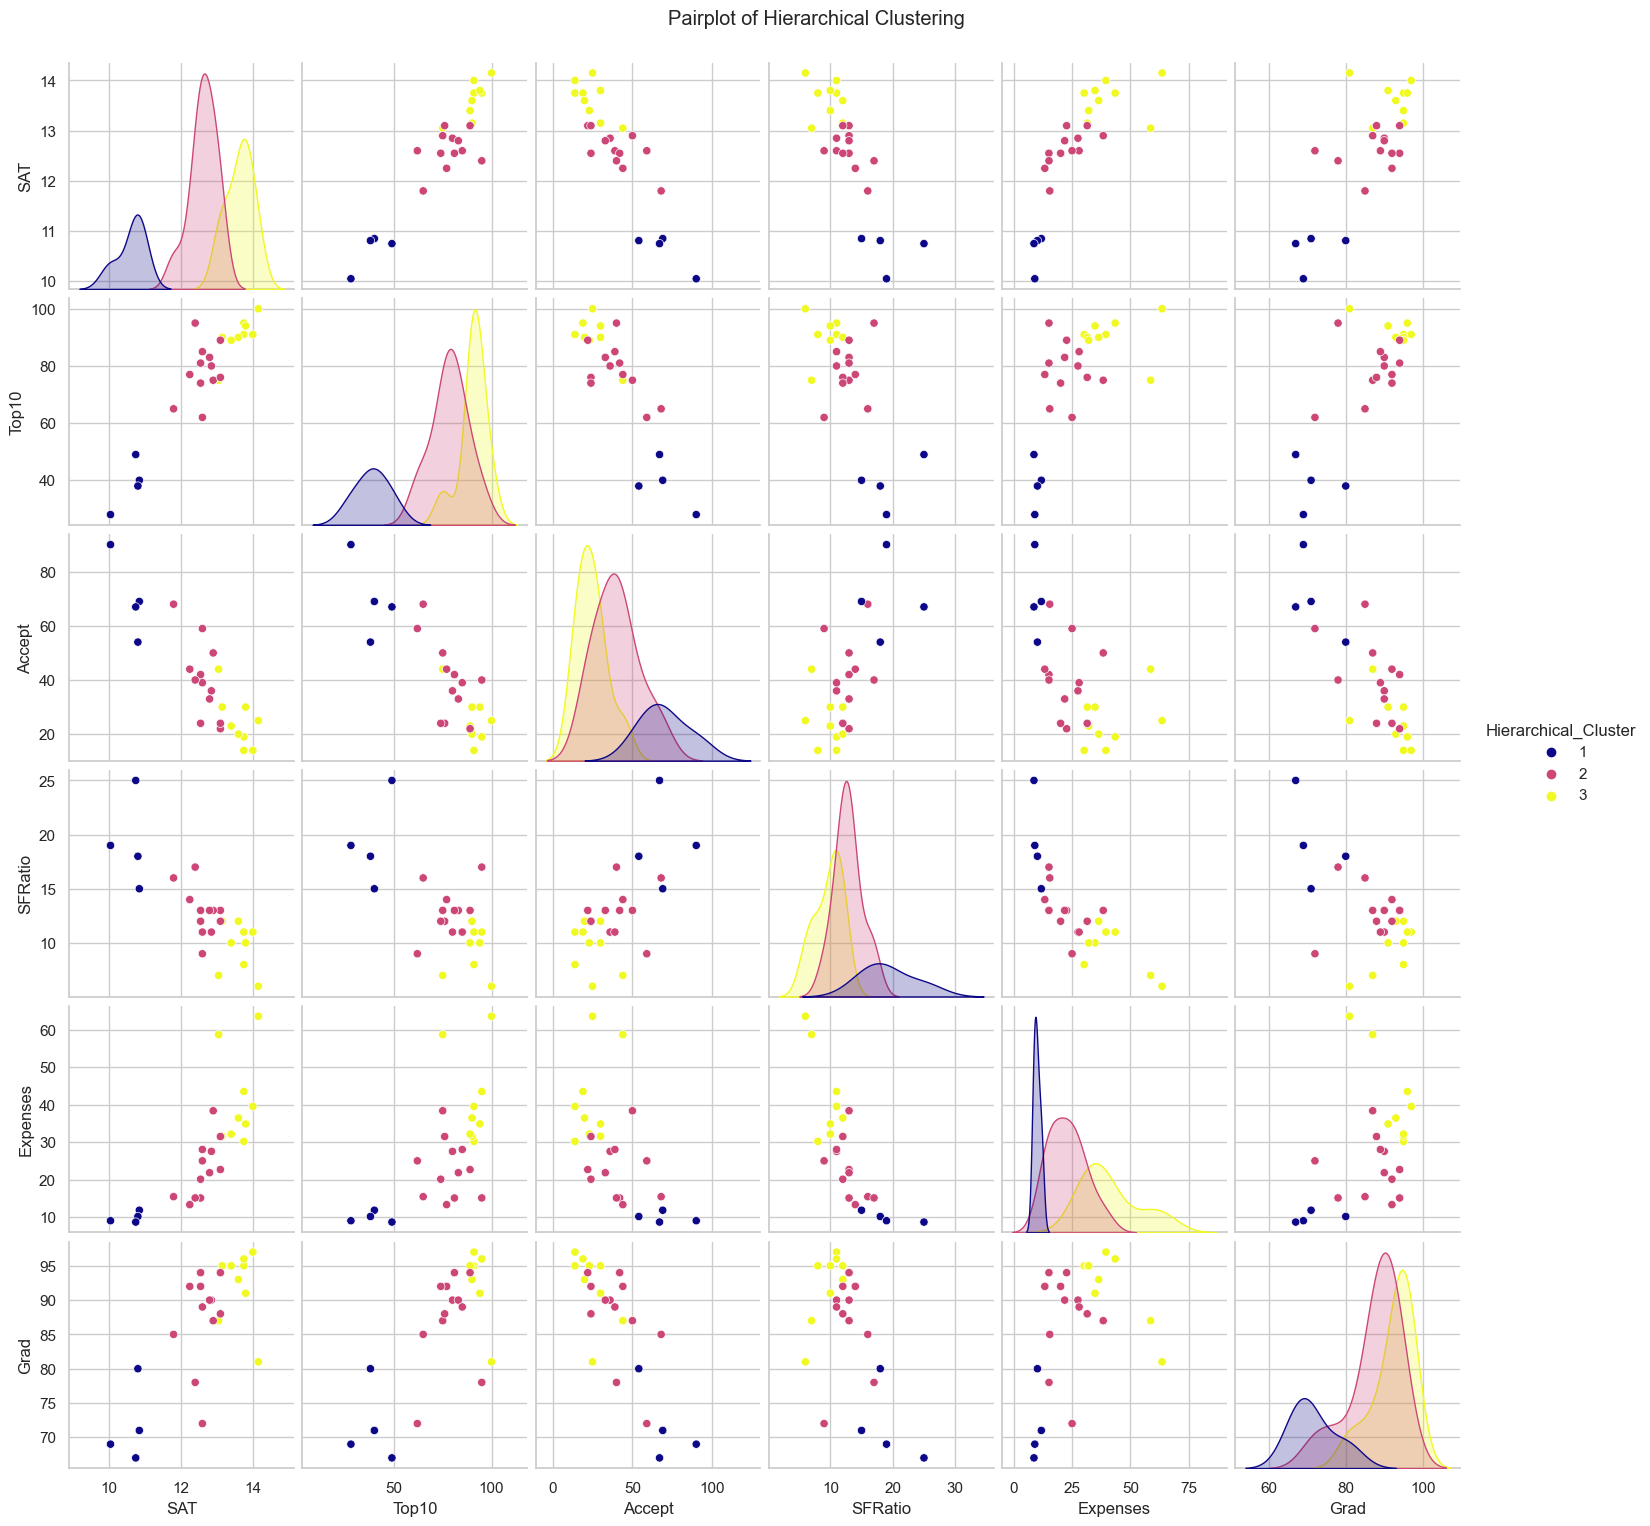

In [8]:
# Pairplot for Hierarchical clustering
sns.pairplot(df, vars=['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'Grad'], hue='Hierarchical_Cluster', palette='plasma')
plt.suptitle("Pairplot of Hierarchical Clustering", y=1.02)
plt.show()

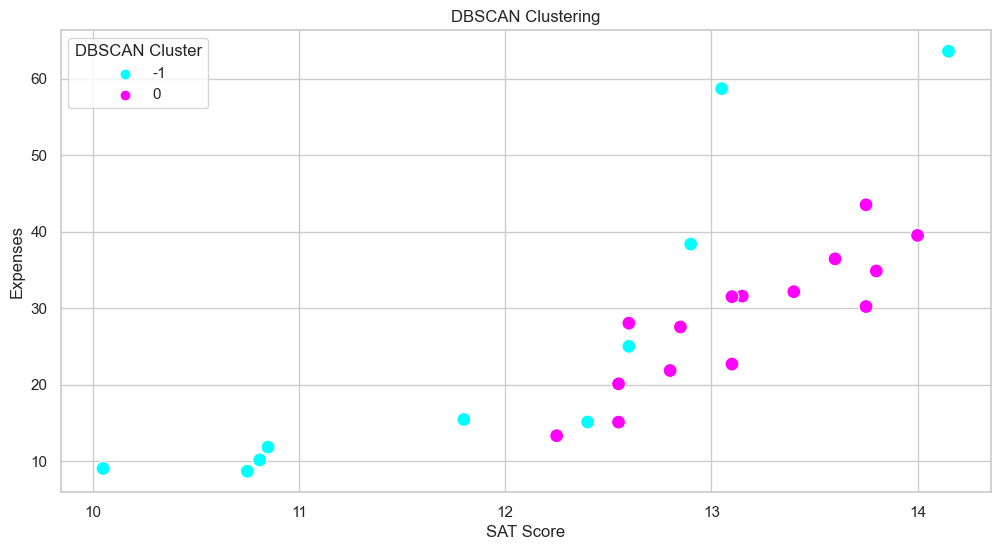

In [13]:
from sklearn.cluster import KMeans, DBSCAN

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=1.2, min_samples=4)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Plot DBSCAN Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='SAT', y='Expenses', hue='DBSCAN_Cluster', palette='cool', s=100)
plt.title("DBSCAN Clustering")
plt.xlabel("SAT Score")
plt.ylabel("Expenses")
plt.legend(title='DBSCAN Cluster')
plt.show()

C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

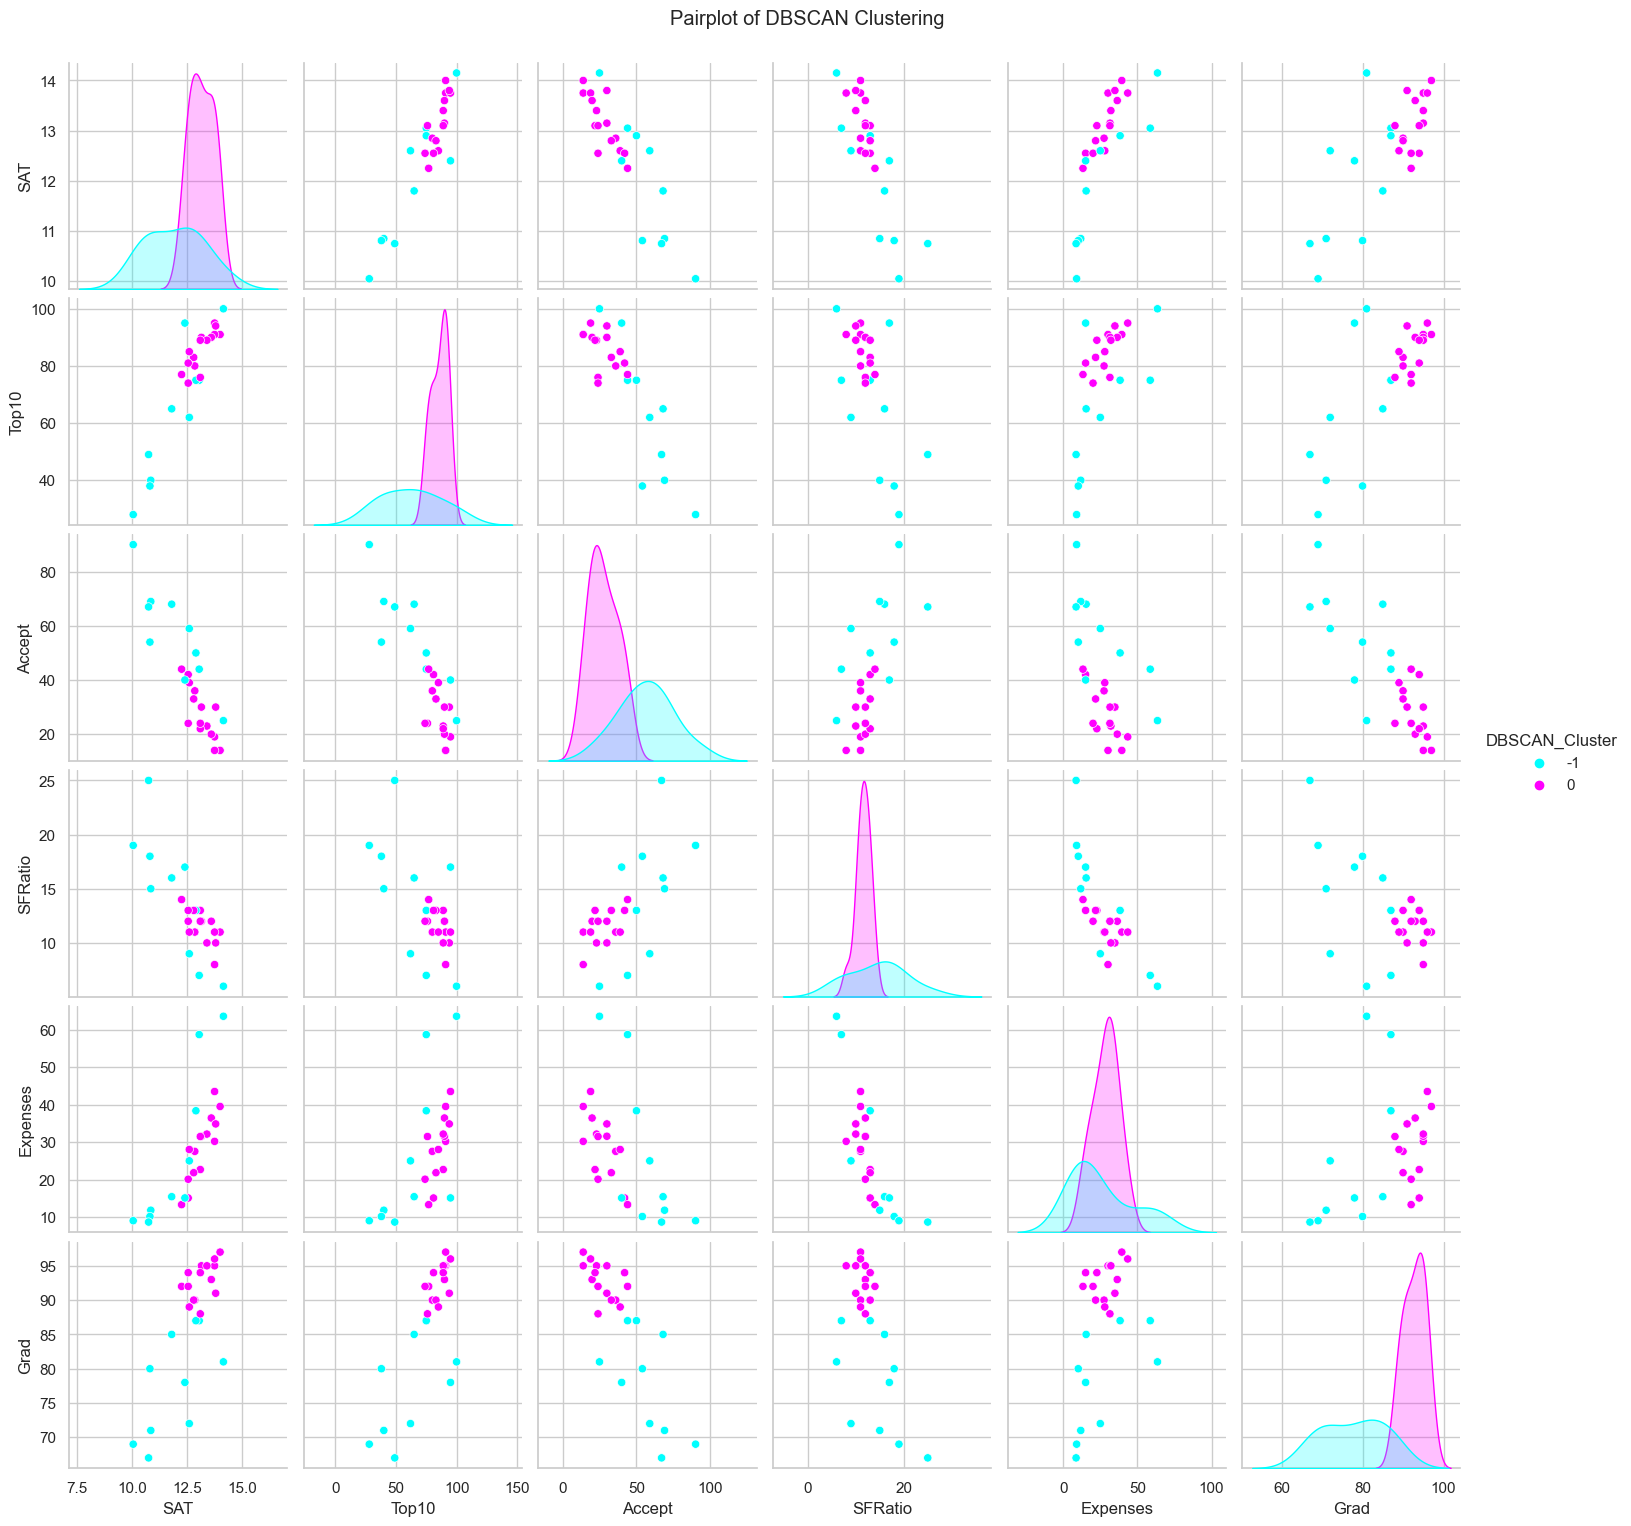

In [14]:

# Pairplot for DBSCAN clustering
sns.pairplot(df, vars=['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'Grad'], hue='DBSCAN_Cluster', palette='cool')
plt.suptitle("Pairplot of DBSCAN Clustering", y=1.02)
plt.show()

In [12]:
# Visualize clustering results
print("K-Means Clusters:")
print(df[['University', 'KMeans_Cluster']])

print("\nHierarchical Clusters:")
print(df[['University', 'Hierarchical_Cluster']])

print("\nDBSCAN Clusters:")
print(df[['University', 'DBSCAN_Cluster']])

K-Means Clusters:
        University  KMeans_Cluster
0          Harvard               2
1        Princeton               2
2             Yale               2
3         Stanford               2
4              MIT               2
5             Duke               2
6          CalTech               2
7        Dartmouth               2
8            Brown               0
9     JohnsHopkins               2
10        UChicago               0
11           UPenn               0
12         Cornell               0
13    Northwestern               0
14        Columbia               0
15       NotreDame               0
16       UVirginia               0
17      Georgetown               0
18  CarnegieMellon               0
19       UMichigan               0
20      UCBerkeley               0
21      UWisconsin               1
22       PennState               1
23          Purdue               1
24        TexasA&M               1

Hierarchical Clusters:
        University  Hierarchical_Cluster
0      

# Q2. Perform discriminant analysis on wine data

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

C:\Users\junsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junsu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


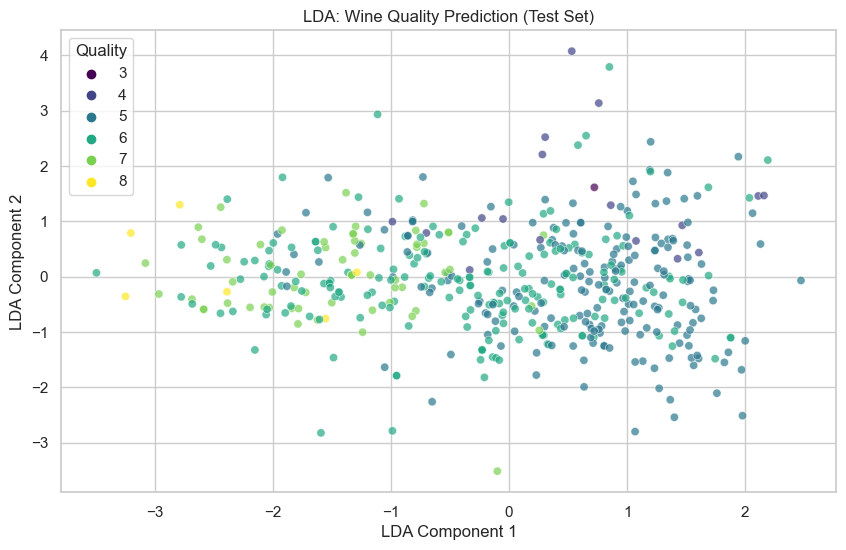

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\junsu\Downloads\VIT Downloads\mda\winequality-red.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Linear Discriminant Analysis
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)  # Fit and transform on the training set
X_test_lda = lda.transform(X_test)  # Only transform on the test set

# Train the LDA model and make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluation: Print the classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the first two LDA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_lda[:, 0], y=X_test_lda[:, 1], hue=y_test, palette='viridis', legend='full', alpha=0.7)
plt.title('LDA: Wine Quality Prediction (Test Set)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Quality')
plt.show()
